# Exercise 7
##### Unsupervised learning

### 1. Find optimal number of clusters in the UCI Mushroom dataset

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Read UCI Mushroom dataset
df = pd.read_csv('agaricus-lepiota.data')
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# dummify data
df_dummy = pd.get_dummies(df)

#Principal component Analysis
pca = decomposition.PCA(n_components = 2)
pca.fit(df_dummy)
df_pca = pca.transform(df_dummy)

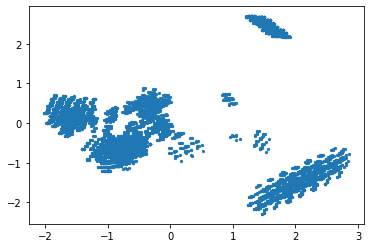

In [5]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=5);

In [6]:
# Cluster score function
def calculate_silhouette_score(n):
    kMeans = KMeans(n_clusters=n)
    kMeans.fit(df_dummy)
    kMeans_labels = kMeans.fit_predict(df_dummy)
    score = silhouette_score(df_pca, kMeans_labels)
    return score

In [11]:
# Get cluster score for n 2-30
score = 0
scores = []
bestScore = 0
bestItteration = 0
for i in range (2, 31):
    
    score = calculate_silhouette_score(i)
    scores.append(score)
    
    if score > bestScore:
        bestScore = score
        bestItteration = i
        
    print("Clusters:", i, "Silhouette score: ", score)
    
print("The ideal cluster amount is:", bestItteration, "It scored: ", bestScore)

Clusters: 2 Silhouette score:  0.6103156047888197
Clusters: 3 Silhouette score:  0.7778789927687585
Clusters: 4 Silhouette score:  0.5211277297926517
Clusters: 5 Silhouette score:  0.4364893337117193
Clusters: 6 Silhouette score:  0.41770490048143366
Clusters: 7 Silhouette score:  0.35999282757467316
Clusters: 8 Silhouette score:  0.3659136458581202
Clusters: 9 Silhouette score:  0.361612341980309
Clusters: 10 Silhouette score:  0.20192363593990972
Clusters: 11 Silhouette score:  0.17021924530697433
Clusters: 12 Silhouette score:  0.15673408120136728
Clusters: 13 Silhouette score:  0.041307535855122125
Clusters: 14 Silhouette score:  -0.006760801950047997
Clusters: 15 Silhouette score:  0.024516514774664867
Clusters: 16 Silhouette score:  0.012697262165211774
Clusters: 17 Silhouette score:  0.017828115012311976
Clusters: 18 Silhouette score:  0.04699665419450331
Clusters: 19 Silhouette score:  0.00047910648773240804
Clusters: 20 Silhouette score:  -0.01817385600599426
Clusters: 21 Silh

3 clusters are the best cluster amount for this dataset.

### 2. Plot the cluster score between k = 2..30

<function matplotlib.pyplot.show(close=None, block=None)>

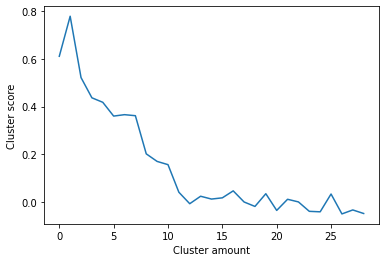

In [12]:
plt.plot(scores)
plt.xlabel('Cluster amount')
plt.ylabel('Cluster score')
plt.show

### 3. Visualise the data with 3 clusters

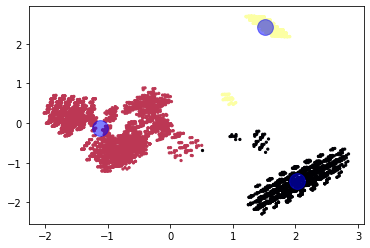

In [28]:
k = KMeans(n_clusters = bestItteration)
k.fit(df_pca)
k_labels = k.fit_predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=k_labels, s=5, cmap='inferno')

centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=250, alpha=0.5)